In [1]:
pip install tensorflow pillow numpy matplotlib


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import os
from PIL import Image
import numpy as np

image_directory = 'Dataset_plant'

def load_images(image_directory):
    images = []
    for file_name in os.listdir(image_directory):
        if file_name.endswith('.jpg') or file_name.endswith('.png'):
            image_path = os.path.join(image_directory, file_name)
            img = Image.open(image_path)
            img = img.resize((128, 128))  # Resize images to a fixed size
            img = np.array(img)
            images.append(img)
    return np.array(images)

images = load_images(image_directory)


In [5]:
pip install albumentations Pillow opencv-python


  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
     ---------------------------------------- 0.0/125.2 kB ? eta -:--:--
     -------------------------------------- 125.2/125.2 kB 7.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/178.0 kB ? eta -:--:--
   ---------------------------------------- 178.0/178.0 kB ? eta 0:00:00
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
    --------------------------------------- 0.8/38.8 MB 17.4 MB/s eta 0:00:03
   - -------------------------------------- 1.5/38.8 MB 18.6 MB/s eta 0:00:03
   - -------------------------------------- 1.6/38.8 MB 14.7 MB/s eta 0:00:03
   - -------------------------------------- 1.6/38.8 MB 14.7 MB/s eta 0:00:03
   - -------------------------------------- 1.6/38.8 MB 14.7 MB/s eta 0:00:03
   - -------------------------------------- 1.6/38.8 MB 14.7 MB/s eta 0:00:03
   - -------------------------------------- 1.8/38.8 MB 5.6 MB/s eta 0:00:07
   -- -------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.29.0 requires packaging<24,>=16.8, but you have packaging 24.1 which is incompatible.
anaconda-cloud-auth 0.1.4 requires pydantic<2.0, but you have pydantic 2.8.2 which is incompatible.

[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
#Albumentation

In [1]:
import os
import cv2
import albumentations as A
from PIL import Image
import numpy as np

# Define your augmentation pipeline without normalization
transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
    A.Rotate(limit=30, p=0.5),
    A.RandomSizedCrop(min_max_height=(100, 300), height=256, width=256, p=0.5)
])

def augment_image(image_path, output_dir):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB

    # Apply augmentations
    augmented = transform(image=image)
    augmented_image = augmented['image']

    # Ensure proper data type and value range
    augmented_image = np.clip(augmented_image * 255, 0, 255).astype(np.uint8)

    # Convert back to PIL for saving
    augmented_image = Image.fromarray(augmented_image)

    # Construct the output path
    basename = os.path.basename(image_path)
    output_path = os.path.join(output_dir, basename)

    # Save the augmented image
    augmented_image.save(output_path)

def augment_images_from_directory(input_dir, output_dir):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for filename in os.listdir(input_dir):
        file_path = os.path.join(input_dir, filename)
        if os.path.isfile(file_path):
            augment_image(file_path, output_dir)

# Define your directories
input_directory = 'data_6789_plant_images'
output_directory = 'Final_Augmented_Dataset_plant'

# Run the augmentation
augment_images_from_directory(input_directory, output_directory)


C:\Users\ranan\anaconda3\Lib\site-packages\albumentations\check_version.py:49: UserWarning: Error fetching version info <urlopen error [Errno 11001] getaddrinfo failed>
  data = fetch_version_info()


In [ ]:
#output_directory = 'Final_Augmented_Dataset_plant'
#input_directory = 'data_6789_plant_images'

In [3]:
import os

# Define the folder names
folder1 = 'Final_Augmented_Dataset_plant'
folder2 = 'data_6789_plant_image'


# Join the folders to create a path
full_path = os.path.join(folder1, folder2)

# Print the full path
print(full_path)


Final_Augmented_Dataset_plant\data_6789_plant_image


In [8]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import os
import numpy as np
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Conv2D, Conv2DTranspose, BatchNormalization, LeakyReLU
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the generator model
def build_generator():
    model = tf.keras.Sequential([
        Dense(256, input_dim=100),
        LeakyReLU(alpha=0.2),
        Reshape((16, 16, 1)),
        Conv2DTranspose(128, kernel_size=3, strides=2, padding='same'),
        BatchNormalization(),
        LeakyReLU(alpha=0.2),
        Conv2DTranspose(64, kernel_size=3, strides=2, padding='same'),
        BatchNormalization(),
        LeakyReLU(alpha=0.2),
        Conv2D(3, kernel_size=3, padding='same', activation='tanh')
    ])
    return model

# Define the discriminator model
def build_discriminator():
    model = tf.keras.Sequential([
        Conv2D(64, kernel_size=3, strides=2, input_shape=(64, 64, 3), padding='same'),
        LeakyReLU(alpha=0.2),
        Conv2D(128, kernel_size=3, strides=2, padding='same'),
        BatchNormalization(),
        LeakyReLU(alpha=0.2),
        Flatten(),
        Dense(1, activation='sigmoid')
    ])
    return model

# Define the GAN model
def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = tf.keras.Sequential([generator, discriminator])
    return model

# Load and preprocess images
def load_images(directory, target_size=(64, 64)):
    datagen = ImageDataGenerator(rescale=1./255)
    generator = datagen.flow_from_directory(
        directory,
        target_size=target_size,
        batch_size=32,
        class_mode=None
    )
    return generator

# Training the GAN
def train_gan(generator, discriminator, gan, data_generator, epochs=10000, batch_size=32):
    for epoch in range(epochs):
        # Train discriminator
        for _ in range(batch_size):
            real_images = next(data_generator)
            noise = np.random.randn(batch_size, 100)
            fake_images = generator.predict(noise)
            d_loss_real = discriminator.train_on_batch(real_images, np.ones((batch_size, 1)))
            d_loss_fake = discriminator.train_on_batch(fake_images, np.zeros((batch_size, 1)))
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train generator
        noise = np.random.randn(batch_size, 100)
        g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))

        if epoch % 1000 == 0:
            print(f"Epoch {epoch} - D Loss: {d_loss[0]} - G Loss: {g_loss}")

# Setup directories
input_directory = 'Dataset_plant'
data_generator = load_images(input_directory)

# Build and compile models
generator = build_generator()
discriminator = build_discriminator()
gan = build_gan(generator, discriminator)

discriminator.compile(optimizer=Adam(0.0002, 0.5), loss='binary_crossentropy')
gan.compile(optimizer=Adam(0.0002, 0.5), loss='binary_crossentropy')

# Train the GAN
train_gan(generator, discriminator, gan, data_generator)


Found 0 images belonging to 0 classes.


C:\Users\ranan\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\ranan\anaconda3\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
C:\Users\ranan\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(32, 1), output.shape=(0, 1)

In [11]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Conv2D, Conv2DTranspose, BatchNormalization, LeakyReLU
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Define the generator model
def build_generator():
    model = tf.keras.Sequential([
        Dense(256, input_dim=100),
        LeakyReLU(alpha=0.2),
        Reshape((16, 16, 1)),
        Conv2DTranspose(128, kernel_size=3, strides=2, padding='same'),
        BatchNormalization(),
        LeakyReLU(alpha=0.2),
        Conv2DTranspose(64, kernel_size=3, strides=2, padding='same'),
        BatchNormalization(),
        LeakyReLU(alpha=0.2),
        Conv2D(3, kernel_size=3, padding='same', activation='tanh')
    ])
    return model

# Define the discriminator model
def build_discriminator():
    model = tf.keras.Sequential([
        Conv2D(64, kernel_size=3, strides=2, input_shape=(64, 64, 3), padding='same'),
        LeakyReLU(alpha=0.2),
        Conv2D(128, kernel_size=3, strides=2, padding='same'),
        BatchNormalization(),
        LeakyReLU(alpha=0.2),
        Flatten(),
        Dense(1, activation='sigmoid')
    ])
    return model

# Define the GAN model
def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = tf.keras.Sequential([generator, discriminator])
    return model


In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def load_images(directory, target_size=(64, 64)):
    datagen = ImageDataGenerator(rescale=1./255)
    generator = datagen.flow_from_directory(
        directory,
        target_size=target_size,
        batch_size=32,
        class_mode=None
    )
    return generator


In [13]:
def train_gan(generator, discriminator, gan, data_generator, epochs=10000, batch_size=32):
    for epoch in range(epochs):
        # Train discriminator
        for _ in range(batch_size):
            real_images = next(data_generator)
            if real_images.shape[0] != batch_size:
                continue  # Skip if the batch size is not as expected

            noise = np.random.randn(batch_size, 100).astype(np.float32)
            fake_images = generator.predict(noise)

            d_loss_real = discriminator.train_on_batch(real_images, np.ones((real_images.shape[0], 1)))
            d_loss_fake = discriminator.train_on_batch(fake_images, np.zeros((batch_size, 1)))
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train generator
        noise = np.random.randn(batch_size, 100).astype(np.float32)
        g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))

        if epoch % 1000 == 0:
            print(f"Epoch {epoch} - D Loss: {d_loss[0]} - G Loss: {g_loss}")


In [14]:
import os
from PIL import Image

def generate_and_save_images(generator, output_dir, num_images=100, noise_dim=100):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    noise = np.random.randn(num_images, noise_dim).astype(np.float32)
    generated_images = generator.predict(noise)

    for i, img_array in enumerate(generated_images):
        img_array = (img_array + 1) / 2.0  # Rescale to [0, 1]
        img_array = (img_array * 255).astype(np.uint8)  # Rescale to [0, 255]
        img = Image.fromarray(img_array)
        img.save(os.path.join(output_dir, f"augmented_image_{i}.png"))

# Setup directories
input_directory = 'Dataset_plant'
output_directory = 'gan_Augmented_Dataset_plant'

# Build and compile models
generator = build_generator()
discriminator = build_discriminator()
gan = build_gan(generator, discriminator)

discriminator.compile(optimizer=Adam(0.0002, 0.5), loss='binary_crossentropy')
gan.compile(optimizer=Adam(0.0002, 0.5), loss='binary_crossentropy')

# Load images and train GAN
data_generator = load_images(input_directory)
train_gan(generator, discriminator, gan, data_generator)

# Generate augmented images
generate_and_save_images(generator, output_directory)


Found 0 images belonging to 0 classes.


UnboundLocalError: cannot access local variable 'd_loss' where it is not associated with a value

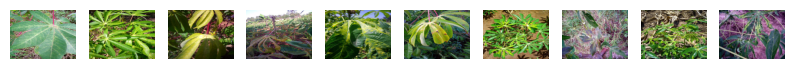

In [15]:
import os
from PIL import Image
import matplotlib.pyplot as plt

def visualize_images(directory, num_images=10):
    # Get list of image file names
    image_files = [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]
    
    # Limit to the number of images to display
    image_files = image_files[:num_images]
    
    # Create a grid for displaying images
    plt.figure(figsize=(10, 10))
    
    for i, img_file in enumerate(image_files):
        img_path = os.path.join(directory, img_file)
        img = Image.open(img_path)
        
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.axis('off')  # Hide axes
        
    plt.show()

# Define your directory
input_directory = 'Dataset_plant'

# Visualize images
visualize_images(input_directory)


In [17]:
import os

# Specify the directory containing the images
image_directory = 'Dataset_plant'

# List all files in the directory
files = os.listdir(image_directory)

# Filter out files that are images based on common image file extensions
image_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tiff')

# Count the number of image files
num_images = len([file for file in files if file.lower().endswith(image_extensions)])

print(f'Number of images in the directory: {num_images}')


Number of images in the directory: 1134


In [19]:
pip install tensorflow keras



[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def load_images(image_directory, target_size=(64, 64)):
    images = []
    for filename in os.listdir(image_directory):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(image_directory, filename)
            img = load_img(img_path, target_size=target_size)
            img = img_to_array(img)
            img = (img - 127.5) / 127.5  # Normalize to [-1, 1]
            images.append(img)
    return np.array(images)

images = load_images('Dataset_plant')


In [21]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.layers import Dense, LeakyReLU, Reshape, Flatten, Conv2D, Conv2DTranspose
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

def load_images(image_directory, target_size=(64, 64)):
    images = []
    for filename in os.listdir(image_directory):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(image_directory, filename)
            img = load_img(img_path, target_size=target_size)
            img = img_to_array(img)
            img = (img - 127.5) / 127.5  # Normalize to [-1, 1]
            images.append(img)
    return np.array(images)

images = load_images('Dataset_plant')


In [22]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.layers import Dense, LeakyReLU, Reshape, Flatten, Conv2D, Conv2DTranspose
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

def load_images(image_directory, target_size=(64, 64)):
    images = []
    for filename in os.listdir(image_directory):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(image_directory, filename)
            img = load_img(img_path, target_size=target_size)
            img = img_to_array(img)
            img = (img - 127.5) / 127.5  # Normalize to [-1, 1]
            images.append(img)
    return np.array(images)

images = load_images('Dataset_plant')


In [23]:
def build_generator():
    model = Sequential([
        Dense(128 * 16 * 16, input_dim=100),
        LeakyReLU(alpha=0.2),
        Reshape((16, 16, 128)),
        Conv2DTranspose(64, kernel_size=4, strides=2, padding='same'),
        LeakyReLU(alpha=0.2),
        Conv2DTranspose(32, kernel_size=4, strides=2, padding='same'),
        LeakyReLU(alpha=0.2),
        Conv2DTranspose(3, kernel_size=7, activation='tanh', padding='same')
    ])
    return model

def build_discriminator(input_shape=(64, 64, 3)):
    model = Sequential([
        Conv2D(64, kernel_size=4, strides=2, padding='same', input_shape=input_shape),
        LeakyReLU(alpha=0.2),
        Conv2D(128, kernel_size=4, strides=2, padding='same'),
        LeakyReLU(alpha=0.2),
        Flatten(),
        Dense(1, activation='sigmoid')
    ])
    return model

def build_dcgan(generator, discriminator):
    discriminator.trainable = False
    model = Sequential([generator, discriminator])
    return model


In [24]:
def compile_and_train_dcgan(generator, discriminator, dcgan, images, epochs=10000, batch_size=64):
    discriminator.compile(optimizer=Adam(0.0002, 0.5), loss='binary_crossentropy', metrics=['accuracy'])
    dcgan.compile(optimizer=Adam(0.0002, 0.5), loss='binary_crossentropy')

    for epoch in range(epochs):
        # Train discriminator
        idx = np.random.randint(0, images.shape[0], batch_size)
        real_images = images[idx]
        fake_images = generator.predict(np.random.randn(batch_size, 100))

        d_loss_real = discriminator.train_on_batch(real_images, np.ones((batch_size, 1)))
        d_loss_fake = discriminator.train_on_batch(fake_images, np.zeros((batch_size, 1)))
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train generator
        g_loss = dcgan.train_on_batch(np.random.randn(batch_size, 100), np.ones((batch_size, 1)))

        if epoch % 1000 == 0:
            print(f"{epoch} [D loss: {d_loss[0]} | D accuracy: {100*d_loss[1]}] [G loss: {g_loss}]")

generator = build_generator()
discriminator = build_discriminator()
dcgan = build_dcgan(generator, discriminator)

compile_and_train_dcgan(generator, discriminator, dcgan, images)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
0 [D loss: 0.7002565860748291 | D accuracy: 36.71875] [G loss: [array(0.6979625, dtype=float32), array(0.6979625, dtype=float32), array(0.359375, dtype=float32)]]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 90m

KeyboardInterrupt: 

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

#@tf.function
def train_discriminator(discriminator, real_images, fake_images, batch_size):
    # Train on real images
    d_loss_real = discriminator.train_on_batch(real_images, tf.ones((batch_size, 1)))
    
    # Train on fake images
    d_loss_fake = discriminator.train_on_batch(fake_images, tf.zeros((batch_size, 1)))
    
    # Average the losses
    d_loss = 0.5 * (d_loss_real[0] + d_loss_fake[0])
    d_acc = 0.5 * (d_loss_real[1] + d_loss_fake[1])
    
    return d_loss, d_acc

#@tf.function
def train_generator(dcgan, batch_size):
    # Train generator
    g_loss = dcgan.train_on_batch(tf.random.normal((batch_size, 100)), tf.ones((batch_size, 1)))
    return g_loss

def compile_and_train_dcgan(generator, discriminator, dcgan, images, epochs=10000, batch_size=64):
    discriminator.compile(optimizer=Adam(0.0002, 0.5), loss='binary_crossentropy', metrics=['accuracy'])
    dcgan.compile(optimizer=Adam(0.0002, 0.5), loss='binary_crossentropy')

    for epoch in range(epochs):
        # Train discriminator
        idx = np.random.randint(0, images.shape[0], batch_size)
        real_images = images[idx]
        fake_images = generator.predict(np.random.randn(batch_size, 100))

        d_loss, d_acc = train_discriminator(discriminator, real_images, fake_images, batch_size)

        # Train generator
        g_loss = train_generator(dcgan, batch_size)

        if epoch % 1000 == 0:
            print(f"{epoch} [D loss: {d_loss} | D accuracy: {100*d_acc}] [G loss: {g_loss}]")

generator = build_generator()
discriminator = build_discriminator()
dcgan = build_dcgan(generator, discriminator)

compile_and_train_dcgan(generator, discriminator, dcgan, images)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
0 [D loss: 0.7387659549713135 | D accuracy: 19.140625] [G loss: [array(0.72348696, dtype=float32), array(0.72348696, dtype=float32), array(0.3515625, dtype=float32)]]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [1]:
import os
import cv2
import numpy as np

def load_images(image_directory, image_size=(64, 64)):
    images = []
    for filename in os.listdir(image_directory):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            img_path = os.path.join(image_directory, filename)
            image = cv2.imread(img_path)
            image = cv2.resize(image, image_size)
            image = (image / 127.5) - 1.0  # Normalize to [-1, 1]
            images.append(image)
    return np.array(images)

images = load_images('Dataset_plant')


In [2]:
from tensorflow.keras.layers import Dense, LeakyReLU, Reshape, Flatten, Conv2D, Conv2DTranspose
from tensorflow.keras.models import Sequential

def build_generator():
    model = Sequential([
        Dense(128 * 8 * 8, input_dim=100),
        LeakyReLU(alpha=0.2),
        Reshape((8, 8, 128)),
        Conv2DTranspose(64, kernel_size=4, strides=2, padding='same'),
        LeakyReLU(alpha=0.2),
        Conv2DTranspose(32, kernel_size=4, strides=2, padding='same'),
        LeakyReLU(alpha=0.2),
        Conv2DTranspose(3, kernel_size=7, activation='tanh', padding='same')
    ])
    return model

def build_discriminator(input_shape=(64, 64, 3)):
    model = Sequential([
        Conv2D(64, kernel_size=4, strides=2, padding='same', input_shape=input_shape),
        LeakyReLU(alpha=0.2),
        Conv2D(128, kernel_size=4, strides=2, padding='same'),
        LeakyReLU(alpha=0.2),
        Flatten(),
        Dense(1, activation='sigmoid')
    ])
    return model

def build_dcgan(generator, discriminator):
    discriminator.trainable = False
    model = Sequential([generator, discriminator])
    return model


In [2]:
import os
import cv2
import numpy as np

def load_images(image_directory, image_size=(64, 64)):
    images = []
    for filename in os.listdir(image_directory):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            img_path = os.path.join(image_directory, filename)
            image = cv2.imread(img_path)
            image = cv2.resize(image, image_size)
            image = (image / 127.5) - 1.0  # Normalize to [-1, 1]
            images.append(image)
    return np.array(images)

images = load_images('Dataset_plant')


In [3]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

def build_generator():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128 * 16 * 16, input_dim=100),
        tf.keras.layers.Reshape((16, 16, 128)),
        tf.keras.layers.Conv2DTranspose(128, kernel_size=3, strides=2, padding='same'),
        tf.keras.layers.LeakyReLU(alpha=0.2),
        tf.keras.layers.Conv2DTranspose(64, kernel_size=3, strides=2, padding='same'),
        tf.keras.layers.LeakyReLU(alpha=0.2),
        tf.keras.layers.Conv2D(3, kernel_size=3, padding='same', activation='tanh')
    ])
    return model

def build_discriminator():
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(64, kernel_size=3, strides=2, padding='same', input_shape=(64, 64, 3)),
        tf.keras.layers.LeakyReLU(alpha=0.2),
        tf.keras.layers.Conv2D(128, kernel_size=3, strides=2, padding='same'),
        tf.keras.layers.LeakyReLU(alpha=0.2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    return model

def build_dcgan(generator, discriminator):
    model = tf.keras.Sequential([generator, discriminator])
    return model

def train_dcgan(generator, discriminator, dcgan, images, epochs=100, batch_size=64):
    discriminator.compile(optimizer=Adam(0.0002, 0.5), loss='binary_crossentropy', metrics=['accuracy'])
    dcgan.compile(optimizer=Adam(0.0002, 0.5), loss='binary_crossentropy')

    for epoch in range(epochs):
        idx = np.random.randint(0, images.shape[0], batch_size)
        real_images = images[idx]
        fake_images = generator.predict(np.random.randn(batch_size, 100))

        d_loss_real = discriminator.train_on_batch(real_images, np.ones((batch_size, 1)))
        d_loss_fake = discriminator.train_on_batch(fake_images, np.zeros((batch_size, 1)))
        d_loss = 0.5 * (d_loss_real[0] + d_loss_fake[0])
        d_acc = 0.5 * (d_loss_real[1] + d_loss_fake[1])

        g_loss = dcgan.train_on_batch(np.random.randn(batch_size, 100), np.ones((batch_size, 1)))

        if epoch % 1000 == 0:
            print(f"{epoch} [D loss: {d_loss} | D accuracy: {100*d_acc}] [G loss: {g_loss}]")

    generator.save('generator.h5')
    discriminator.save('discriminator.h5')
    dcgan.save('dcgan.h5')

generator = build_generator()
discriminator = build_discriminator()
dcgan = build_dcgan(generator, discriminator)

train_dcgan(generator, discriminator, dcgan, images)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step 
0 [D loss: 0.671768069267273 | D accuracy: 60.9375] [G loss: [array(0.68103147, dtype=float32), array(0.68103147, dtype=float32), array(0.40625, dtype=float32)]]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
2

In [7]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

def build_generator():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128 * 16 * 16, input_dim=100),
        tf.keras.layers.Reshape((16, 16, 128)),
        tf.keras.layers.Conv2DTranspose(128, kernel_size=3, strides=2, padding='same'),
        tf.keras.layers.LeakyReLU(alpha=0.2),
        tf.keras.layers.Conv2DTranspose(64, kernel_size=3, strides=2, padding='same'),
        tf.keras.layers.LeakyReLU(alpha=0.2),
        tf.keras.layers.Conv2D(3, kernel_size=3, padding='same', activation='tanh')
    ])
    return model

def build_discriminator():
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(64, kernel_size=3, strides=2, padding='same', input_shape=(64, 64, 3)),
        tf.keras.layers.LeakyReLU(alpha=0.2),
        tf.keras.layers.Conv2D(128, kernel_size=3, strides=2, padding='same'),
        tf.keras.layers.LeakyReLU(alpha=0.2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    return model

def build_dcgan(generator, discriminator):
    model = tf.keras.Sequential([generator, discriminator])
    return model

def train_dcgan(generator, discriminator, dcgan, images, epochs=700, batch_size=32):
    discriminator.compile(optimizer=Adam(0.0002, 0.5), loss='binary_crossentropy', metrics=['accuracy'])
    dcgan.compile(optimizer=Adam(0.0002, 0.5), loss='binary_crossentropy')

    for epoch in range(epochs):
        idx = np.random.randint(0, images.shape[0], batch_size)
        real_images = images[idx]
        fake_images = generator.predict(np.random.randn(batch_size, 100))

        d_loss_real = discriminator.train_on_batch(real_images, np.ones((batch_size, 1)))
        d_loss_fake = discriminator.train_on_batch(fake_images, np.zeros((batch_size, 1)))
        d_loss = 0.5 * (d_loss_real[0] + d_loss_fake[0])
        d_acc = 0.5 * (d_loss_real[1] + d_loss_fake[1])

        g_loss = dcgan.train_on_batch(np.random.randn(batch_size, 100), np.ones((batch_size, 1)))

        if epoch % 1000 == 0:
            print(f"{epoch} [D loss: {d_loss} | D accuracy: {100*d_acc}] [G loss: {g_loss}]")

    generator.save('generator1.h5')
    discriminator.save('discriminator1.h5')
    dcgan.save('dcgan2.h5')

generator = build_generator()
discriminator = build_discriminator()
dcgan = build_dcgan(generator, discriminator)

train_dcgan(generator, discriminator, dcgan, images)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
0 [D loss: 0.6759242415428162 | D accuracy: 60.9375] [G loss: [array(0.6830255, dtype=float32), array(0.6830255, dtype=float32), array(0.40625, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/

In [6]:
def generate_augmented_images(generator, num_images=100, latent_dim=100, image_size=(64, 64)):
    noise = np.random.randn(num_images, latent_dim)
    generated_images = generator.predict(noise)
    generated_images = (generated_images + 1) * 127.5  # Convert back to [0, 255]
    generated_images = generated_images.astype(np.uint8)
    return generated_images

def save_images(images, directory='(8902)augmented_images(9018)'):
    os.makedirs(directory, exist_ok=True)
    for i, img in enumerate(images):
        img_path = os.path.join(directory, f'augmented_{i}.jpg')
        cv2.imwrite(img_path, img)

# Generate and save augmented images
num_augmented_images = 100  # Number of augmented images you want to generate
generated_images = generate_augmented_images(generator, num_images=num_augmented_images)
save_images(generated_images)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


In [8]:
def generate_augmented_images(generator, num_images=100, latent_dim=100, image_size=(64, 64)):
    noise = np.random.randn(num_images, latent_dim)
    generated_images = generator.predict(noise)
    generated_images = (generated_images + 1) * 127.5  # Convert back to [0, 255]
    generated_images = generated_images.astype(np.uint8)
    return generated_images

def save_images(images, directory='(all)augmented_images(all)'):
    os.makedirs(directory, exist_ok=True)
    for i, img in enumerate(images):
        img_path = os.path.join(directory, f'augmented_{i}.jpg')
        cv2.imwrite(img_path, img)

# Generate and save augmented images
num_augmented_images = 100  # Number of augmented images you want to generate
generated_images = generate_augmented_images(generator, num_images=num_augmented_images)
save_images(generated_images)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
